In [ ]:
# notebook to plot the baseline model output and the features one by one to determine predictive powers

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [40]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [64]:
import math

In [2]:
# read in csv file data   choosing most recent for example
season_1718 = pd.read_csv('season-1718.csv')

In [3]:
# add column to use as most baseline model which is mean of the y
season_1718['mean_spread'] = 0.4

In [5]:
#add the actual spread for our y
season_1718.apply(lambda row: row.FTHG - row.FTAG, axis=1)
season_1718['Spread'] = season_1718.apply(lambda row: row.FTHG - row.FTAG, axis=1)

In [46]:
y, X = patsy.dmatrices('Spread ~ mean_spread', data=season_1718, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

/Users/michaelweber/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Spread   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 22 Jan 2019   Prob (F-statistic):                nan
Time:                        15:57:50   Log-Likelihood:                -781.73
No. Observations:                 380   AIC:                             1565.
Df Residuals:                     379   BIC:                             1569.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3312      0.084      3.951      0.000       0.166       0.496
mean_spread     0.1325      0.034      3.951      0.000       0.067       0.198
==============================================================================
Omnibus:                        1.917   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.831
Skew:                           0.028   Prob(JB):                        0.400
Kurtosis:                       3.335   Cond. No.                     2.55e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.77e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
# really bad baseline model R measures and coefficients as expected
mean_squared_error(y, X)

ValueError: y_true and y_pred have different number of output (1!=2)

In [13]:
# now load in the full data set and try to check models of each feature one by one
three_seasons = pd.read_csv('15-18_three_seasons.csv')

In [15]:
# remove some of the unnecessary columns
seasons_lite = three_seasons.drop(columns=['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'home_goal_diff', 'away_goal_diff', 'Unnamed: 0'])

In [18]:
seasons_lite.tail(2)

Date  MatchDay  HST  AST  Home_total_goals_for  \
1138  5/15/16        38    1    3                    34   
1139  5/17/16        38    5    0                    49   

      Home_total_goals_conceded  Away_total_goals_for  \
1138                         48                    63   
1139                         35                    45   

      Away_total_goals_conceded  HomeTeam_rank  AwayTeam_rank  Home_Attack  \
1138                         50             14              8     0.580866   
1139                         67              5             16     0.837130   

      Away_Attack    Home_D    Away_D  Spread  
1138     1.397929  1.065089  0.854214       0  
1139     0.998521  0.776627  1.144647       2

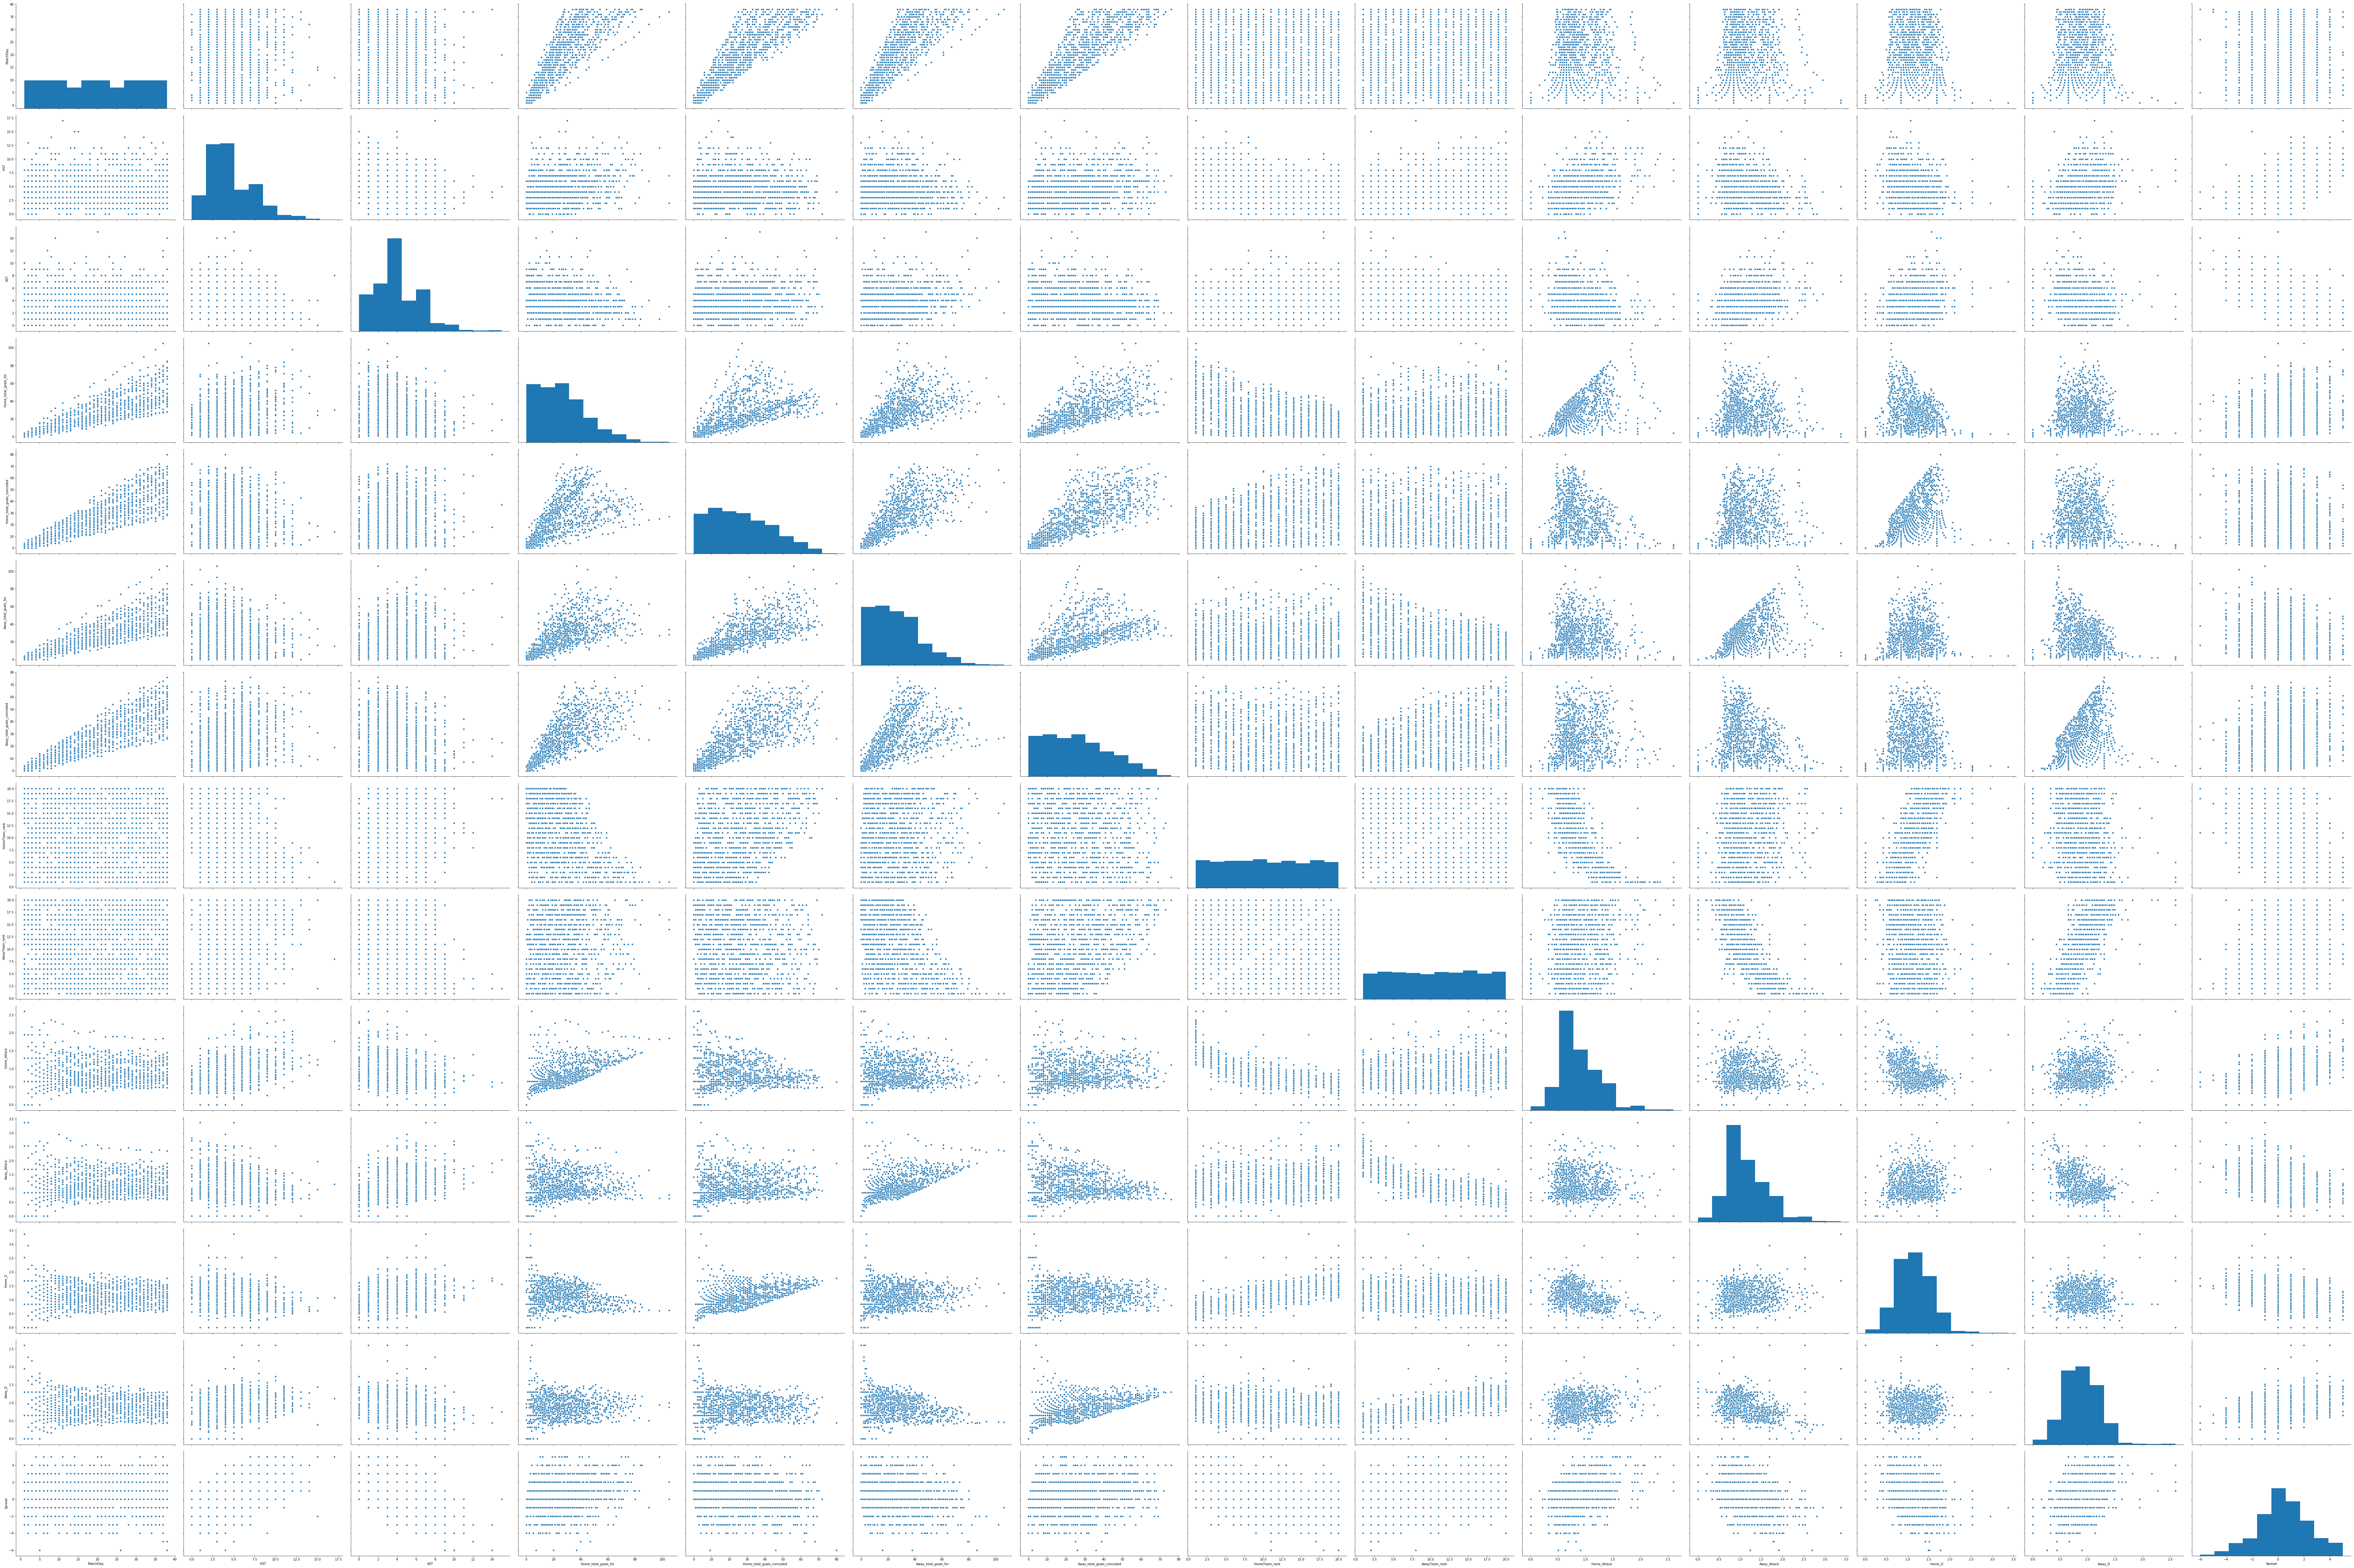

In [21]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(seasons_lite, size=5, aspect=1.5);

In [ ]:
# begin to model each feature one by one to determine most predictive to least
lm1 = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=df)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

In [22]:
seasons_lite.head(2)

Date  MatchDay  HST  AST  Home_total_goals_for  \
0  8/11/17         1   10    3                     4   
1  8/12/17         1    2    4                     0   

   Home_total_goals_conceded  Away_total_goals_for  Away_total_goals_conceded  \
0                          3                     3                          4   
1                          2                     2                          0   

   HomeTeam_rank  AwayTeam_rank  Home_Attack  Away_Attack    Home_D    Away_D  \
0              5             15     2.596811     2.529586  2.529586  2.596811   
1             17              4     0.000000     1.686391  1.686391  0.000000   

   Spread  
0       1  
1      -2

In [75]:
from sklearn.metrics import mean_absolute_error

In [99]:
BL_1 = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X3 + X6 model
X = seasons_lite[['Away_D']]

# Choose the response variable(s)
y = seasons_lite['Spread']

# Fit the model to the full dataset
BL_1.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_1.score(X, y)

0.14997223595219933

In [27]:
print(BL_1.intercept_, BL_1.coef_)

-1.6323322889720504 [2.25615699]


In [76]:
mean_absolute_error(y, X)

1.4231378462649122

In [61]:
mean_squared_error(y, X)

3.3178238222860856

In [65]:
math.sqrt(3.3178238222860856)

1.8214894515989066

In [77]:
BL_2 = LinearRegression()
X = seasons_lite[['Home_D']]
y = seasons_lite['Spread']
BL_2.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_2.score(X, y)

0.11015881820825024

In [28]:
print(BL_2.intercept_, BL_2.coef_)

2.090770169265356 [-1.53191043]


In [78]:
mean_absolute_error(y, X)

1.6874873931394738

In [59]:
mean_squared_error(y, X)

4.645985108819643

In [66]:
math.sqrt(4.645985108819643)

2.1554547336512644

In [79]:
BL_3 = LinearRegression()
X = seasons_lite[['Away_Attack']]
y = seasons_lite['Spread']
BL_3.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_3.score(X, y)

0.1641589532134398

In [29]:
print(BL_3.intercept_, BL_3.coef_)

2.1485590859433046 [-1.57983712]


In [80]:
mean_absolute_error(y, X)

1.7251445699666668

In [57]:
mean_squared_error(y, X)

4.930361482408735

In [67]:
math.sqrt(4.930361482408735)

2.2204417313698497

In [81]:
BL_4 = LinearRegression()
X = seasons_lite[['Home_Attack']]
y = seasons_lite['Spread']
BL_4.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_4.score(X, y)

0.18286159653629508

In [30]:
print(BL_4.intercept_, BL_4.coef_)

-1.5440719897204855 [2.16009807]


In [82]:
mean_absolute_error(y, X)

1.4077454590587717

In [55]:
mean_squared_error(y, X)

3.2256877610059127

In [68]:
math.sqrt(3.2256877610059127)

1.796019977897215

In [83]:
BL_5 = LinearRegression()
X = seasons_lite[['AwayTeam_rank']]
y = seasons_lite['Spread']
BL_5.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_5.score(X, y)

0.18613445932433337

In [32]:
print(BL_5.intercept_, BL_5.coef_)

-1.0962850106686066 [0.13752723]


In [84]:
mean_absolute_error(y, X)

10.206140350877194

In [53]:
mean_squared_error(y, X)

131.5061403508772

In [70]:
math.sqrt(131.5061403508772)

11.467612670075546

In [85]:
BL_6 = LinearRegression()
X = seasons_lite[['HomeTeam_rank']]
y = seasons_lite['Spread']
BL_6.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_6.score(X, y)

0.18562800064141916

In [34]:
print(BL_6.intercept_, BL_6.coef_)

1.7876922377471198 [-0.13777143]


In [86]:
mean_absolute_error(y, X)

10.249122807017544

In [51]:
mean_squared_error(y, X)

146.68947368421053

In [71]:
math.sqrt(146.68947368421053)

12.111542993533504

In [87]:
BL_7 = LinearRegression()
X = seasons_lite[['AST']]
y = seasons_lite['Spread']
BL_7.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_7.score(X, y)

0.22716247411709822

In [36]:
print(BL_7.intercept_, BL_7.coef_)

1.8249900792192706 [-0.38363586]


In [88]:
mean_absolute_error(y, X)

3.9035087719298245

In [44]:
mean_squared_error(y, X)

24.74736842105263

In [72]:
math.sqrt(24.74736842105263)

4.974672694866732

In [89]:
BL_8 = LinearRegression()
X = seasons_lite[['HST']]
y = seasons_lite['Spread']
BL_8.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_8.score(X, y)

0.27604381993727667

In [38]:
print(BL_8.intercept_, BL_8.coef_)

-1.325093779342276 [0.35813822]


In [90]:
mean_absolute_error(y, X)

4.340350877192982

In [42]:
mean_squared_error(y, X)

24.256140350877192

In [73]:
math.sqrt(24.256140350877192)

4.925052319608107

In [62]:
BL_9 = LinearRegression()
X = seasons_lite[['MatchDay']]
y = seasons_lite['Spread']
BL_9.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_9.score(X, y)

0.0017025599442304085

In [63]:
print(BL_8.intercept_, BL_8.coef_, mean_squared_error(y, X))

-1.325093779342276 [0.35813822] 488.52982456140353


In [94]:
seasons_lite.head(1)

Date  MatchDay  HST  AST  Home_total_goals_for  \
0  8/11/17         1   10    3                     4   

   Home_total_goals_conceded  Away_total_goals_for  Away_total_goals_conceded  \
0                          3                     3                          4   

   HomeTeam_rank  AwayTeam_rank  Home_Attack  Away_Attack    Home_D    Away_D  \
0        0.47619       1.428571     2.596811     2.529586  2.529586  2.596811   

   Spread  
0       1

In [92]:
# create new feature experiment by dividing team ranks by the mean to separate them
seasons_lite.apply(lambda row: row.HomeTeam_rank / 10.5, axis=1)
seasons_lite['HomeTeam_rank'] = seasons_lite.apply(lambda row: row.HomeTeam_rank / 10.5, axis=1)

In [93]:
seasons_lite.apply(lambda row: row.AwayTeam_rank / 10.5, axis=1)
seasons_lite['AwayTeam_rank'] = seasons_lite.apply(lambda row: row.AwayTeam_rank / 10.5, axis=1)

In [95]:
BL_10 = LinearRegression()
X = seasons_lite[['HomeTeam_rank']]
y = seasons_lite['Spread']
BL_10.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_10.score(X, y)

0.18562800064141916

In [96]:
print(BL_8.intercept_, BL_8.coef_, math.sqrt(mean_squared_error(y, X))), mean_absolute_error(y, X)

-1.325093779342276 [0.35813822] 2.2289874940960024


(None, 1.770593149540518)

In [97]:
BL_11 = LinearRegression()
X = seasons_lite[['AwayTeam_rank']]
y = seasons_lite['Spread']
BL_11.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_11.score(X, y)

0.18613445932433337

In [98]:
print(BL_8.intercept_, BL_8.coef_, math.sqrt(mean_squared_error(y, X))), mean_absolute_error(y, X)

-1.325093779342276 [0.35813822] 1.800850912549238


(None, 1.4293233082706769)

In [104]:
seasons_lite.head(2)

Date  MatchDay  HST  AST  Home_total_goals_for  \
0  8/11/17         1   10    3                     4   
1  8/12/17         1    2    4                     0   

   Home_total_goals_conceded  Away_total_goals_for  Away_total_goals_conceded  \
0                          3                     3                          4   
1                          2                     2                          0   

   HomeTeam_rank  AwayTeam_rank  Home_Attack  Away_Attack    Home_D    Away_D  \
0       0.476190       1.428571     2.596811     2.529586  2.529586  2.596811   
1       1.619048       0.380952     0.000000     1.686391  1.686391  0.000000   

   Spread  
0       1  
1      -2

In [110]:
BL_12 = LinearRegression()
X = seasons_lite[['Away_D', 'Home_D', 'Away_Attack', 'Home_Attack', 'AwayTeam_rank', 'HomeTeam_rank', 'AST', 'HST']]
y = seasons_lite['Spread']
BL_12.fit(X, y)

# Print out the R^2 for the model against the full dataset
BL_12.score(X, y)

0.5030989479964496

In [111]:
print(BL_12.intercept_, BL_12.coef_)

0.29338981000242337 [ 1.02371404 -0.25214387 -0.70294054  0.58406729 -0.15728401 -0.25913316
 -0.21077694  0.20323377]
